In [2]:
import pandas as pd
print('Nama : Reival Muhamad Asyari Uzzukru')
print('NPM : 41155050210018')
sensus = {
    'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk': [
        'pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita'
    ]
}

sensus_df = pd.DataFrame(sensus)
sensus_df

Nama : Reival Muhamad Asyari Uzzukru
NPM : 41155050210018


,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


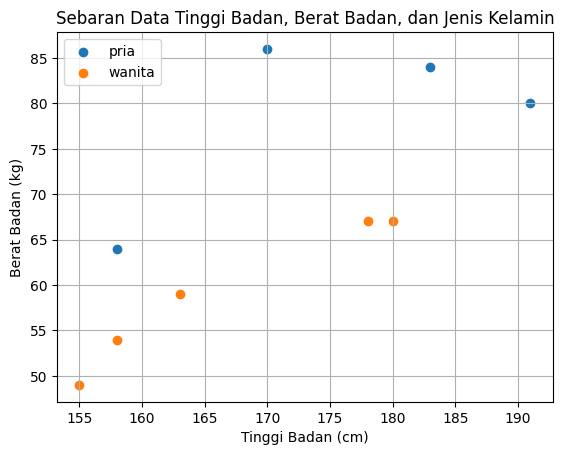

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()


In [5]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
X_train = np.array(sensus_df[['tinggi', 'berat']])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]



NameError: name 'y_train' is not defined

In [6]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [8]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [9]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 1 1]


In [11]:
from sklearn.neighbors import KNeighborsClassifier
print('Nama : Reival Muhamad Asyari Uzzukru')
print('NPM : 41155050210018')
K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

Nama : Reival Muhamad Asyari Uzzukru
NPM : 41155050210018


KNeighborsClassifier(n_neighbors=3)

In [13]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

array([[155,  70]])

In [14]:
y_new = model.predict(X_new)
y_new 

array([1])

In [15]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

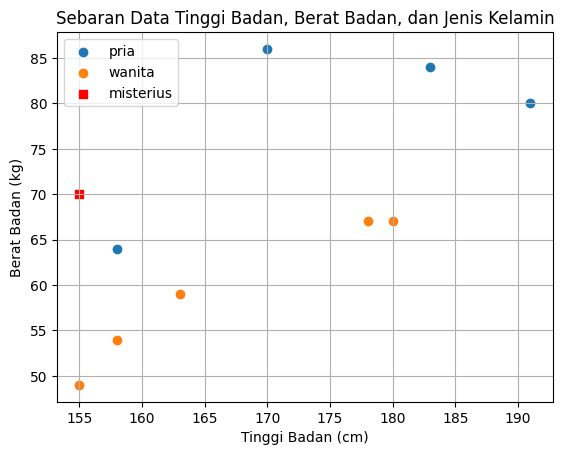

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan,
            berat_badan, 
            marker='s', 
            color='red', 
            label='misterius')
plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

In [17]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [18]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]], dtype=int64)

In [20]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [21]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values('jarak')

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


In [23]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 1 1]


In [24]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [27]:
from sklearn.metrics import accuracy_score
print('Nama : Reival Muhamad Asyari Uzzukru')
print('NPM : 41155050210018')

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Nama : Reival Muhamad Asyari Uzzukru
NPM : 41155050210018
Accuracy: 0.75


In [28]:
from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred)
print(f'Precision: {prec}')

Precision: 0.6666666666666666


In [29]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')


F1-score: 0.8


In [30]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 1.0


In [33]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [35]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.5773502691896258


In [36]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', data_home='./dataset/mnist', return_X_y=True)
X.shape

(70000, 784)

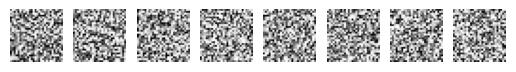

In [44]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

pos = 1
for data in X[:8]:
    plt.subplot(1, 8, pos)
    plt.imshow(data.reshape((28, 28)), 
               cmap=cm.Greys_r)
    plt.axis('off')
    pos += 1
plt.show()

In [45]:
y[:8]

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [46]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

In [47]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [49]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001]
}
grid_search = GridSearchCV(estimator=SVC(random_state=0),
                          param_grid=parameters,
                          n_jobs=6,
                          verbose=1,
                          scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\Reival\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [50]:
print(f'Best Score: {grid_search.best_score_}')
best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')
for param in parameters:
    print(f'\t{param}: {best_params[param]}')

Best Score: 0.9
Best Parameters:
	kernel: rbf
	C: 1
	gamma: 0.01


In [52]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

